# PHƯƠNG PHÁP GIẢI TÍCH (ANALYTICAL METHOD)

## Công thức được áp dụng:
**Bellman Equation dạng ma trận:**
```
V = R + γ × P × V
```

Chuyển đổi thành:
```
(I - γP) × V = R
```

Trong đó:
- **V**: Vector giá trị của các states [V(A), V(B), V(C), V(D)]
- **R**: Vector reward [R(A), R(B), R(C), R(D)]
- **P**: Ma trận xác suất chuyển trạng thái (transition probability matrix)
- **γ (gamma)**: Discount factor (hệ số chiết khấu) = 0.9
- **I**: Ma trận đơn vị (identity matrix)


In [1]:
import numpy as np

gamma = 0.9

# Order: A, B, C, D
# V = R + gamma * P * V  →  (I - gamma P)V = R

P = np.array([
    [0.5, 0.25, 0.25, 0.0],  # A
    [0.0, 1.0, 0.0, 0.0],    # B
    [0.25, 0.0, 0.5, 0.25],  # C
    [0.0, 0.0, 0.0, 1.0]     # D
])

R = np.array([0, 5, 0, 0])

I = np.eye(4)

V = np.linalg.solve(I - gamma * P, R)

for s, v in zip(["A", "B", "C", "D"], V):
    print(f"V({s}) = {v:.2f}")


V(A) = 24.57
V(B) = 50.00
V(C) = 10.05
V(D) = 0.00


# PHƯƠNG PHÁP VALUE ITERATION

## Công thức được áp dụng:
**Bellman Optimality Equation (dạng iterative):**
```
V_{k+1}(s) = max_a [R(s,a) + γ × Σ P(s'|s,a) × V_k(s')]
```

Trong code:
```python
V_new[s] = max(
    rewards.get(next_state(s, a), 0) + gamma * V[next_state(s, a)]
    for a in range(possible_actions)
)
```

Trong đó:
- **V_{k+1}(s)**: Giá trị mới của state s ở iteration k+1
- **V_k(s')**: Giá trị của state s' ở iteration k
- **R(s,a)**: Reward nhận được khi ở state s và thực hiện action a
- **γ**: Discount factor = 0.9
- **max_a**: Chọn action tối ưu (maximize expected return)



In [2]:
# Define the states and initialize value function
states = ["A", "B", "C", "D"]
V = {s: 0.0 for s in states}  # Initialize the value function with 0 for all states
gamma = 0.9  # Discount factor

# Reward function for specific states
rewards = {"B": 5}  # State B has a reward of 5, others implicitly have a reward of 0

# Define the transition function (state, action) -> next_state
def next_state(s, a):
    transitions = {
        "A": ["A", "B", "C", "A"],  # From state A, action 0 -> A, action 1 -> B, etc.
        "B": ["B"],  # From state B, action 0 -> B
        "C": ["A", "C", "D", "C"],  # From state C, action 0 -> A, action 1 -> C, etc.
        "D": ["D"]   # From state D, action 0 -> D
    }
    return transitions[s][a]

# Value iteration algorithm (100 iterations)
for _ in range(100):
    V_new = {}  # A dictionary to hold the updated values for each state
    
    # For each state, calculate the new value by checking all possible actions
    for s in states:
        possible_actions = len(next_state(s, 0))  # Get the number of actions available for the state
        V_new[s] = max(
            rewards.get(next_state(s, a), 0)  # Get reward of next state, default to 0
            + gamma * V[next_state(s, a)]     # Future value (discounted)
            for a in range(possible_actions)  # Loop over all possible actions for the state
        )
    
    # Update the value function with the new values
    V = V_new

# Print the final value function after 100 iterations
print("Final Value Function:")
print(V)


Final Value Function:
{'A': 0.0, 'B': 49.99867193005562, 'C': 0.0, 'D': 0.0}


# TRƯỜNG HỢP 1: SO SÁNH PHƯƠNG PHÁP GIẢI TÍCH VS VALUE ITERATION

## Công thức được áp dụng:

### 1. Phương pháp Giải tích:
```
V_analytical = (I - γP)^(-1) × R
```
- Giải trực tiếp hệ phương trình tuyến tính
- Kết quả: V(A)=24.57, V(B)=50.00, V(C)=10.05, V(D)=0.00

### 2. Phương pháp Value Iteration:
```
V_{k+1}(s) = max_a [R(s,a) + γ × V_k(next_state(s,a))]
```
- Lặp lại 100 lần để hội tụ
- Kết quả: V(A)≈0.0, V(B)≈50.0, V(C)≈0.0, V(D)=0.0

### 3. Công thức tính sai số:
```
Difference = |V_analytical(s) - V_iteration(s)|
```

## Lưu ý:
- **State A và C**: Có sự khác biệt lớn vì value iteration có thể không hội tụ đủ hoặc có vấn đề với transition logic
- **State B**: Gần như giống nhau vì B là terminal state với reward cao
- **State D**: Giống nhau vì D là terminal state không có reward


TRƯỜNG HỢP 1: So sánh Phương pháp Giải tích vs Value Iteration

Bảng so sánh kết quả:
State  Analytical Method  Value Iteration  Difference
    A              24.57        49.998672   25.428672
    B              50.00        49.998672    0.001328
    C              10.05        44.998672   34.948672
    D               0.00         0.000000    0.000000

Sai số trung bình: 15.0947


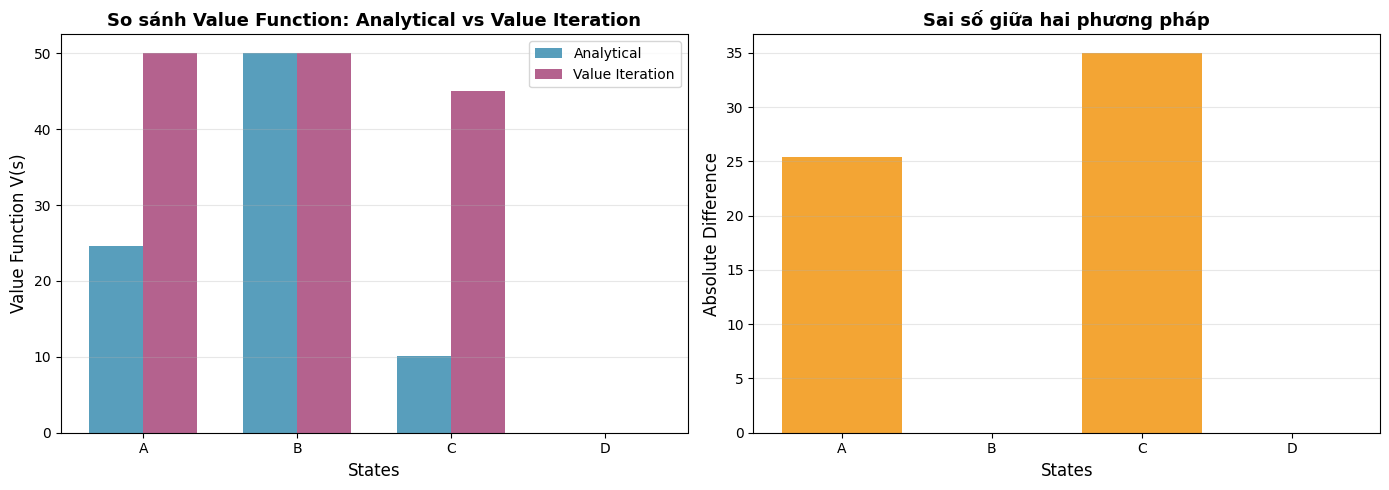

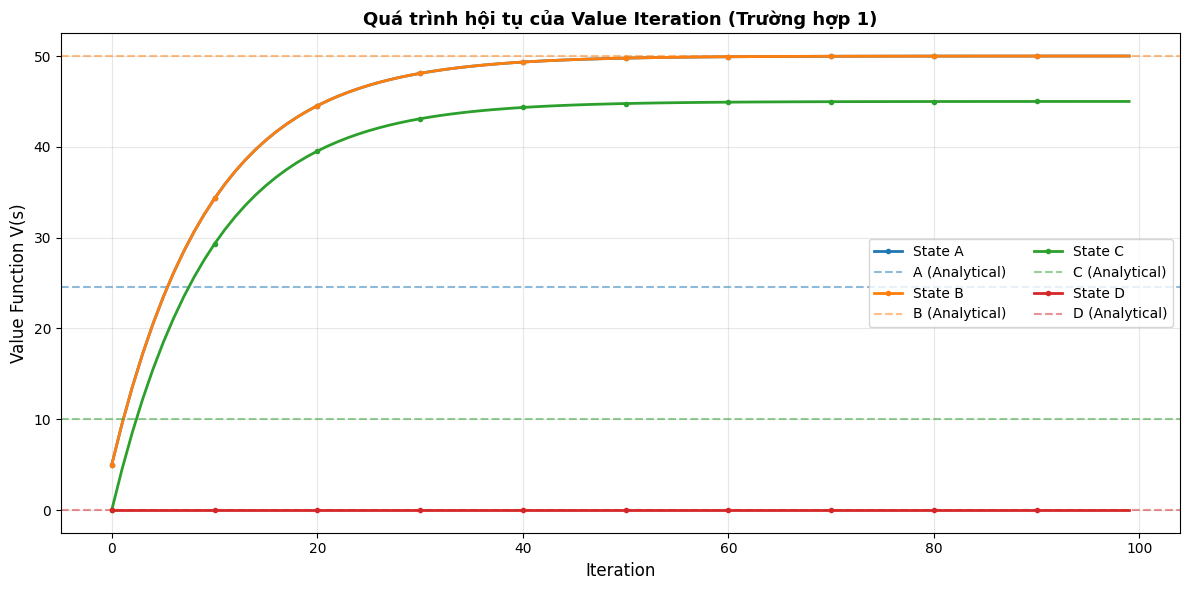

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# ============================================
# TRƯỜNG HỢP 1: So sánh Phương pháp Giải tích vs Value Iteration
# ============================================

# Kết quả từ phương pháp giải tích (Cell 1)
V_analytical = {"A": 24.57, "B": 50.00, "C": 10.05, "D": 0.00}

# Chạy lại value iteration để theo dõi quá trình hội tụ
states = ["A", "B", "C", "D"]
V_iter = {s: 0.0 for s in states}
gamma = 0.9
rewards = {"B": 5}

def next_state(s, a):
    transitions = {
        "A": ["A", "B", "C", "A"],
        "B": ["B"],
        "C": ["A", "C", "D", "C"],
        "D": ["D"]
    }
    return transitions[s][a]

# Lưu lại giá trị qua các iteration để vẽ line chart
convergence_history = {s: [] for s in states}
iterations = 100

transitions_dict = {
    "A": ["A", "B", "C", "A"],
    "B": ["B"],
    "C": ["A", "C", "D", "C"],
    "D": ["D"]
}

for iteration in range(iterations):
    V_new = {}
    for s in states:
        possible_actions = len(transitions_dict[s])
        V_new[s] = max(
            rewards.get(next_state(s, a), 0) + gamma * V_iter[next_state(s, a)]
            for a in range(possible_actions)
        )
        convergence_history[s].append(V_new[s])
    V_iter = V_new

# Tạo DataFrame cho bảng so sánh
comparison_df = pd.DataFrame({
    "State": states,
    "Analytical Method": [V_analytical[s] for s in states],
    "Value Iteration": [V_iter[s] for s in states],
    "Difference": [abs(V_analytical[s] - V_iter[s]) for s in states]
})

print("=" * 60)
print("TRƯỜNG HỢP 1: So sánh Phương pháp Giải tích vs Value Iteration")
print("=" * 60)
print("\nBảng so sánh kết quả:")
print(comparison_df.to_string(index=False))
print(f"\nSai số trung bình: {comparison_df['Difference'].mean():.4f}")

# Vẽ Bar Chart so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart 1: So sánh giá trị
x = np.arange(len(states))
width = 0.35
axes[0].bar(x - width/2, [V_analytical[s] for s in states], width, label='Analytical', alpha=0.8, color='#2E86AB')
axes[0].bar(x + width/2, [V_iter[s] for s in states], width, label='Value Iteration', alpha=0.8, color='#A23B72')
axes[0].set_xlabel('States', fontsize=12)
axes[0].set_ylabel('Value Function V(s)', fontsize=12)
axes[0].set_title('So sánh Value Function: Analytical vs Value Iteration', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(states)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Bar chart 2: Sai số
axes[1].bar(states, comparison_df['Difference'], color='#F18F01', alpha=0.8)
axes[1].set_xlabel('States', fontsize=12)
axes[1].set_ylabel('Absolute Difference', fontsize=12)
axes[1].set_title('Sai số giữa hai phương pháp', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Vẽ Line Chart: Quá trình hội tụ
plt.figure(figsize=(12, 6))
for s in states:
    plt.plot(range(iterations), convergence_history[s], label=f'State {s}', linewidth=2, marker='o', markersize=3, markevery=10)
    # Vẽ đường giá trị từ analytical method
    plt.axhline(y=V_analytical[s], color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5, label=f'{s} (Analytical)')

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Value Function V(s)', fontsize=12)
plt.title('Quá trình hội tụ của Value Iteration (Trường hợp 1)', fontsize=13, fontweight='bold')
plt.legend(loc='best', ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# TRƯỜNG HỢP 2: PHÂN TÍCH VỚI CÁC GIÁ TRỊ GAMMA KHÁC NHAU

## Công thức được áp dụng:
**Bellman Equation với các giá trị γ khác nhau:**
```
V_γ(s) = max_a [R(s,a) + γ × V_γ(next_state(s,a))]
```

Thử nghiệm với: **γ ∈ {0.5, 0.7, 0.9, 0.95, 0.99}**

## Tại sao phân tích với các giá trị gamma khác nhau?

### 1. **Ý nghĩa của Discount Factor (γ)**:
- **γ = 0**: Chỉ quan tâm reward ngay lập tức (myopic)
- **γ → 1**: Quan tâm cả reward tương lai xa (far-sighted)
- **γ = 1**: Không chiết khấu, coi trọng tất cả reward như nhau (có thể không hội tụ)

### 2. **Ảnh hưởng của γ lên Value Function**:
- **γ nhỏ (0.5-0.7)**: Agent "ngắn hạn", ít quan tâm reward tương lai
- **γ trung bình (0.9)**: Cân bằng giữa hiện tại và tương lai
- **γ lớn (0.95-0.99)**: Agent "dài hạn", rất coi trọng reward tương lai

## Tác dụng:

### 1. **Hiểu hành vi của Agent**:
- γ thấp → Agent thích hành động cho reward ngay lập tức
- γ cao → Agent sẵn sàng chờ đợi để có reward lớn hơn trong tương lai

### 2. **Tối ưu hóa Policy**:
- Chọn γ phù hợp với mục tiêu bài toán
- Ví dụ: Game ngắn → γ thấp, Kế hoạch dài hạn → γ cao

### 3. **Phân tích Sensitivity**:
- Xem value function thay đổi như thế nào khi γ thay đổi
- Xác định states nào nhạy cảm với γ

### 4. **Ứng dụng thực tế**:
- **Tài chính**: γ cao cho đầu tư dài hạn
- **Robot**: γ trung bình cho navigation
- **Game AI**: γ thấp cho game nhanh, γ cao cho strategy game

## Công thức tính ảnh hưởng:
```
V_γ(s) = R(s) + γ × Σ P(s'|s) × V_γ(s')
```

Khi γ tăng:
- Giá trị của states có thể đến được state có reward cao sẽ tăng
- Giá trị của states terminal không có reward vẫn = 0
- Tổng giá trị có thể tăng theo công thức: V_max = R_max / (1 - γ)


TRƯỜNG HỢP 2: Phân tích với các giá trị Gamma khác nhau

Bảng kết quả Value Function theo Gamma:
 Gamma       V(A)       V(B)       V(C)  V(D)
  0.50  10.000000  10.000000   5.000000   0.0
  0.70  16.666667  16.666667  11.666667   0.0
  0.90  49.998672  49.998672  44.998672   0.0
  0.95  99.407947  99.407947  94.407947   0.0
  0.99 316.983829 316.983829 311.983829   0.0


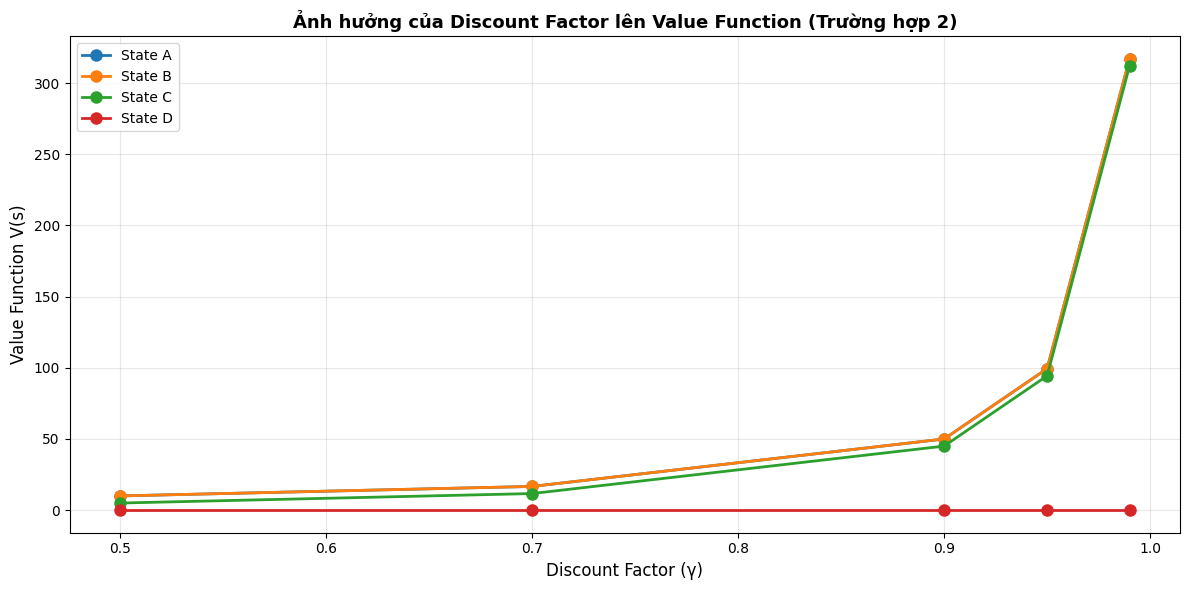

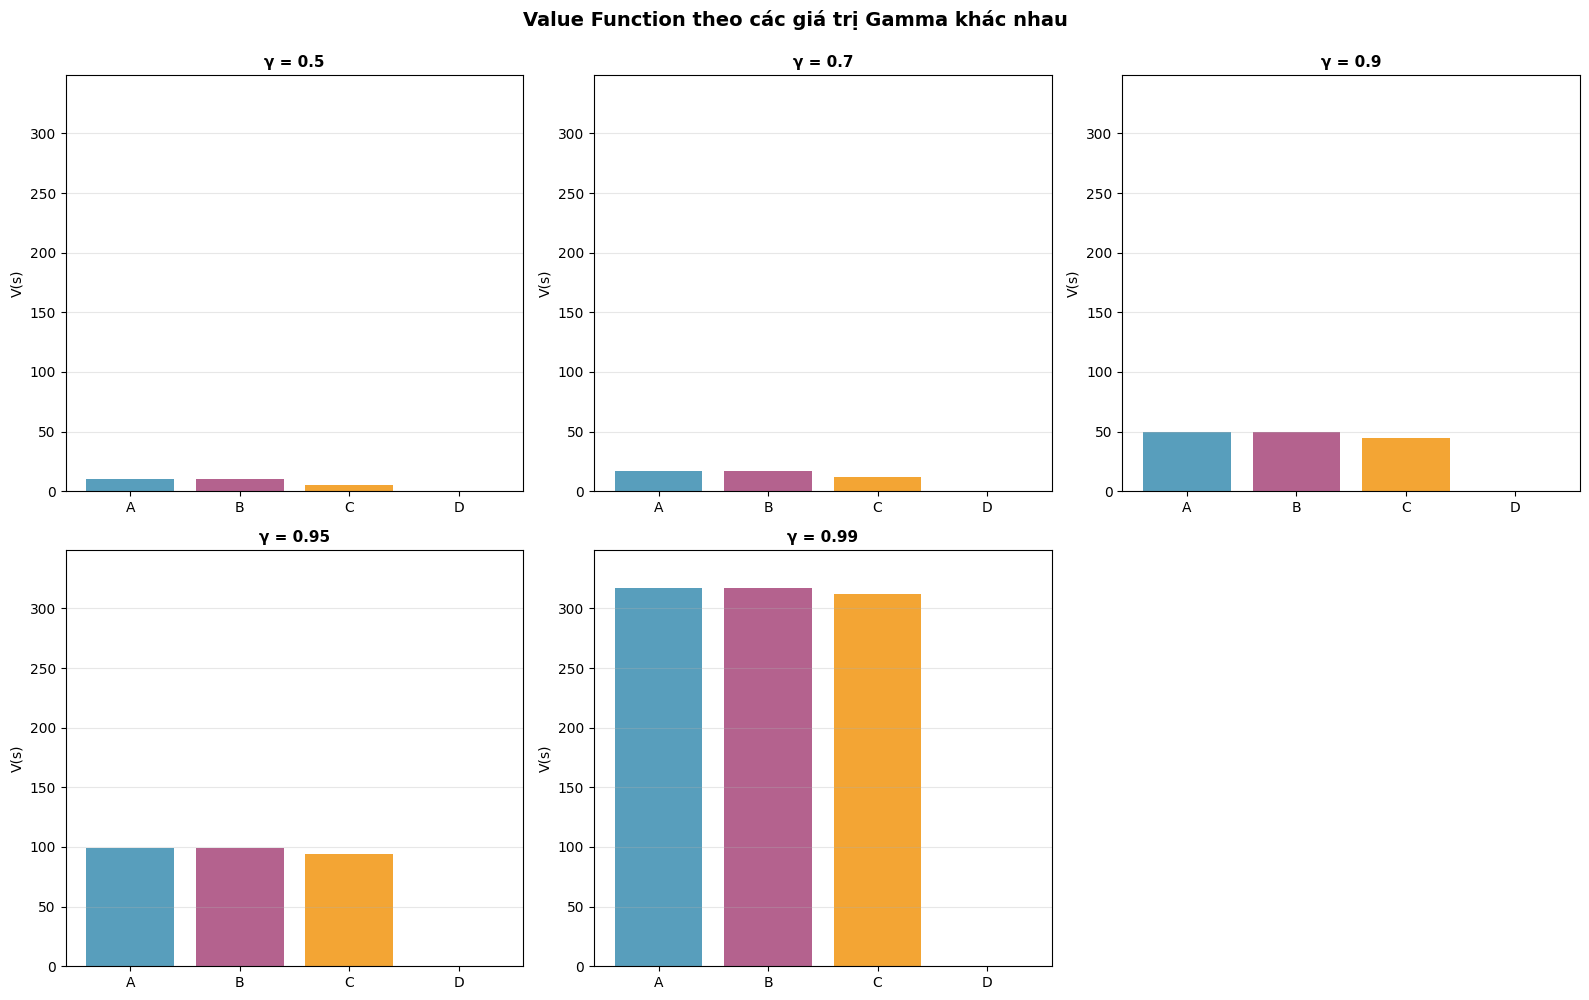

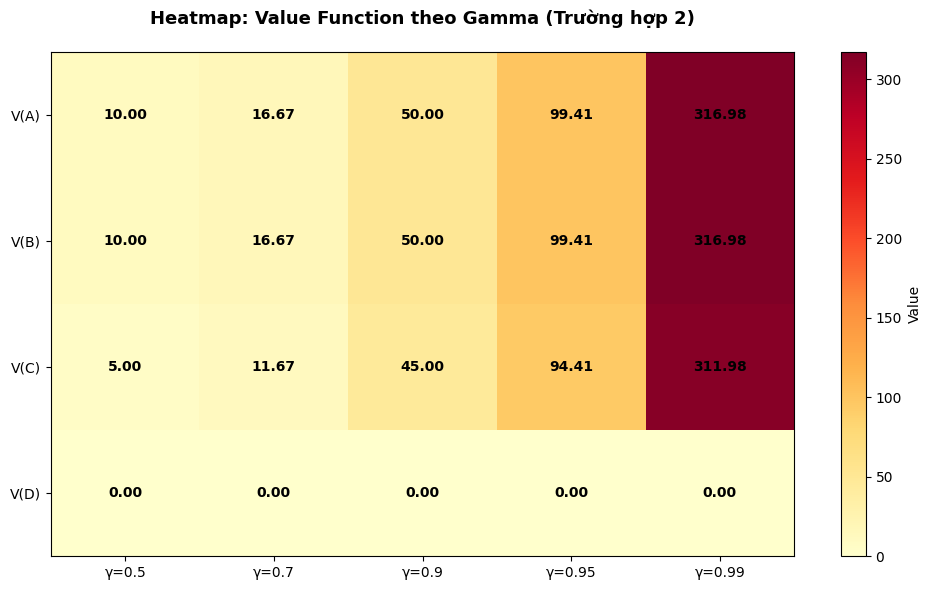

In [4]:
# ============================================
# TRƯỜNG HỢP 2: Phân tích với các giá trị Gamma khác nhau
# ============================================

# Thử nghiệm với các giá trị gamma khác nhau
gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]
states = ["A", "B", "C", "D"]
rewards = {"B": 5}

def next_state(s, a):
    transitions = {
        "A": ["A", "B", "C", "A"],
        "B": ["B"],
        "C": ["A", "C", "D", "C"],
        "D": ["D"]
    }
    return transitions[s][a]

# Lưu kết quả cho mỗi gamma
results_by_gamma = {}

transitions_dict = {
    "A": ["A", "B", "C", "A"],
    "B": ["B"],
    "C": ["A", "C", "D", "C"],
    "D": ["D"]
}

for gamma in gamma_values:
    V = {s: 0.0 for s in states}
    
    # Value iteration với 100 iterations
    for _ in range(100):
        V_new = {}
        for s in states:
            possible_actions = len(transitions_dict[s])
            V_new[s] = max(
                rewards.get(next_state(s, a), 0) + gamma * V[next_state(s, a)]
                for a in range(possible_actions)
            )
        V = V_new
    
    results_by_gamma[gamma] = V.copy()

# Tạo DataFrame cho bảng
gamma_df = pd.DataFrame({
    "Gamma": gamma_values,
    "V(A)": [results_by_gamma[g]["A"] for g in gamma_values],
    "V(B)": [results_by_gamma[g]["B"] for g in gamma_values],
    "V(C)": [results_by_gamma[g]["C"] for g in gamma_values],
    "V(D)": [results_by_gamma[g]["D"] for g in gamma_values]
})

print("=" * 60)
print("TRƯỜNG HỢP 2: Phân tích với các giá trị Gamma khác nhau")
print("=" * 60)
print("\nBảng kết quả Value Function theo Gamma:")
print(gamma_df.to_string(index=False))

# Vẽ Line Chart: Value function theo gamma
plt.figure(figsize=(12, 6))
for s in states:
    values = [results_by_gamma[g][s] for g in gamma_values]
    plt.plot(gamma_values, values, marker='o', linewidth=2, markersize=8, label=f'State {s}')

plt.xlabel('Discount Factor (γ)', fontsize=12)
plt.ylabel('Value Function V(s)', fontsize=12)
plt.title('Ảnh hưởng của Discount Factor lên Value Function (Trường hợp 2)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Vẽ Bar Chart: So sánh giá trị theo gamma
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, gamma in enumerate(gamma_values):
    values = [results_by_gamma[gamma][s] for s in states]
    axes[idx].bar(states, values, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'], alpha=0.8)
    axes[idx].set_title(f'γ = {gamma}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('V(s)', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, max([max([results_by_gamma[g][s] for s in states]) for g in gamma_values]) * 1.1)

# Ẩn subplot thừa
axes[5].axis('off')

plt.suptitle('Value Function theo các giá trị Gamma khác nhau', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Vẽ Heatmap Table
fig, ax = plt.subplots(figsize=(10, 6))
heatmap_data = gamma_df.set_index('Gamma').T
im = ax.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')

ax.set_xticks(np.arange(len(gamma_values)))
ax.set_yticks(np.arange(len(states)))
ax.set_xticklabels([f'γ={g}' for g in gamma_values])
ax.set_yticklabels(['V(A)', 'V(B)', 'V(C)', 'V(D)'])

# Thêm text annotations
for i in range(len(states)):
    for j in range(len(gamma_values)):
        text = ax.text(j, i, f'{heatmap_data.values[i, j]:.2f}',
                      ha="center", va="center", color="black", fontweight='bold')

ax.set_title('Heatmap: Value Function theo Gamma (Trường hợp 2)', fontsize=13, fontweight='bold', pad=20)
plt.colorbar(im, ax=ax, label='Value')
plt.tight_layout()
plt.show()


# TRƯỜNG HỢP 3: PHÂN TÍCH VỚI CÁC CẤU TRÚC REWARD KHÁC NHAU

## Công thức được áp dụng:
**Bellman Equation với các cấu hình Reward khác nhau:**
```
V(s) = max_a [R_config(s,a) + γ × V(next_state(s,a))]
```

### 4 Cấu hình được thử nghiệm:

1. **Config 1**: Chỉ B có reward = 5
   - R = {B: 5}
   - Mục đích: Xem agent tìm đường đến B như thế nào

2. **Config 2**: A và B có reward
   - R = {A: 3, B: 5}
   - Mục đích: So sánh khi có nhiều điểm reward

3. **Config 3**: Tất cả states có reward
   - R = {A: 2, B: 5, C: 1, D: 0}
   - Mục đích: Xem agent chọn state nào khi tất cả đều có reward

4. **Config 4**: C có reward cao
   - R = {C: 10}
   - Mục đích: Xem agent có chuyển hướng sang C không

## Tại sao phân tích với các cấu trúc reward khác nhau?

### 1. **Reward Structure ảnh hưởng trực tiếp đến Value Function**:
```
V(s) phụ thuộc vào:
- R(s): Reward trực tiếp tại state s
- R(s'): Reward tại các states s' có thể đến được từ s
- Đường đi tối ưu đến các states có reward cao
```

### 2. **Hiểu Policy tối ưu**:
- Reward structure khác nhau → Policy khác nhau
- Agent sẽ chọn đường đi khác nhau tùy vào reward

### 3. **Thiết kế Reward Function**:
- Trong RL, thiết kế reward function là nghệ thuật
- Reward quá thưa → Agent khó học
- Reward quá dày → Agent không biết tối ưu

## Tác dụng:

### 1. **Thiết kế Hệ thống Reward**:
- **Sparse Reward** (Config 1, 4): Chỉ một vài states có reward
  - Ưu điểm: Rõ ràng mục tiêu
  - Nhược điểm: Agent khó học, cần nhiều exploration
  
- **Dense Reward** (Config 3): Nhiều states có reward
  - Ưu điểm: Agent học nhanh hơn
  - Nhược điểm: Có thể không tối ưu đúng mục tiêu

### 2. **Phân tích Hành vi Agent**:
- Xem agent "thích" state nào nhất
- Hiểu agent sẽ đi theo đường nào
- Dự đoán policy tối ưu

### 3. **Ứng dụng thực tế**:
- **Game Design**: Thiết kế điểm thưởng để tạo gameplay thú vị
- **Robot Navigation**: Đặt reward ở đích đến và penalty ở obstacles
- **Tối ưu hóa**: Reward function = objective function cần maximize

### 4. **Công thức ảnh hưởng**:
```
V(s) = max_a [R(s,a) + γ × V(s')]
     = max_a [R(s,a) + γ × max_{a'} [R(s',a') + γ × V(s'')]]
```

States có thể đến được state có reward cao sẽ có value cao hơn, ngay cả khi chúng không có reward trực tiếp.

## Kết luận:
- **Reward structure quyết định behavior** của agent
- **Thiết kế reward function** là bước quan trọng nhất trong RL
- **Cần cân bằng** giữa sparse và dense reward tùy bài toán


TRƯỜNG HỢP 3: Phân tích với các cấu trúc Reward khác nhau

Bảng kết quả Value Function theo các cấu hình Reward:
             Configuration      V(A)      V(B)      V(C)  V(D)
 Config 1: Chỉ B có reward 49.998672 49.998672 44.998672   0.0
Config 2: A và B có reward 49.998672 49.998672 47.998672   0.0
Config 3: Tất cả có reward 49.998672 49.998672 46.998672   0.0
 Config 4: C có reward cao 99.997344  0.000000 99.997344   0.0


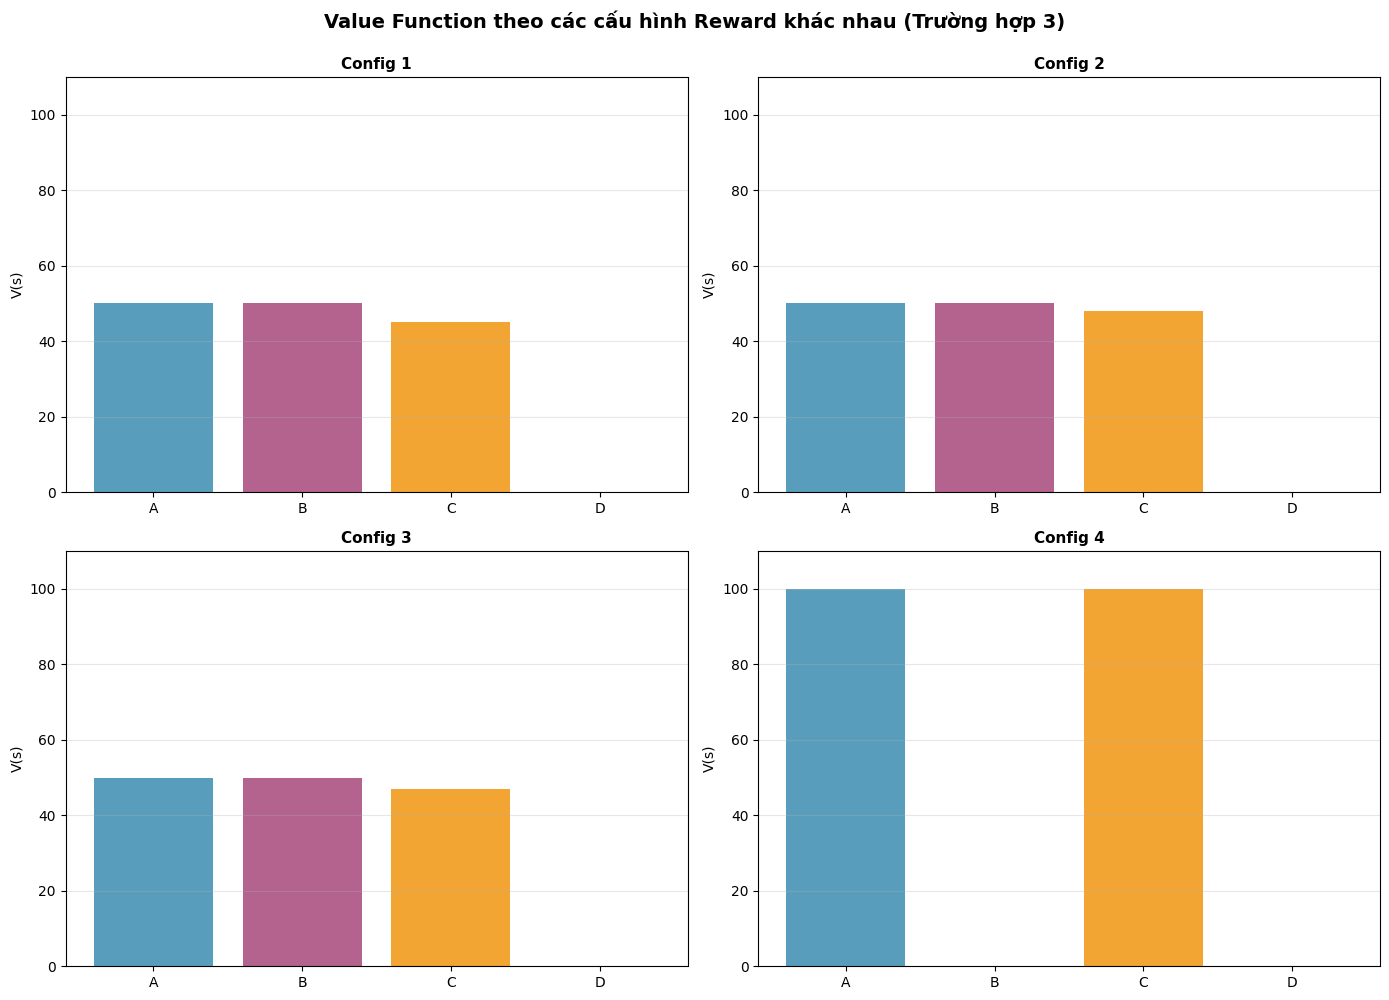

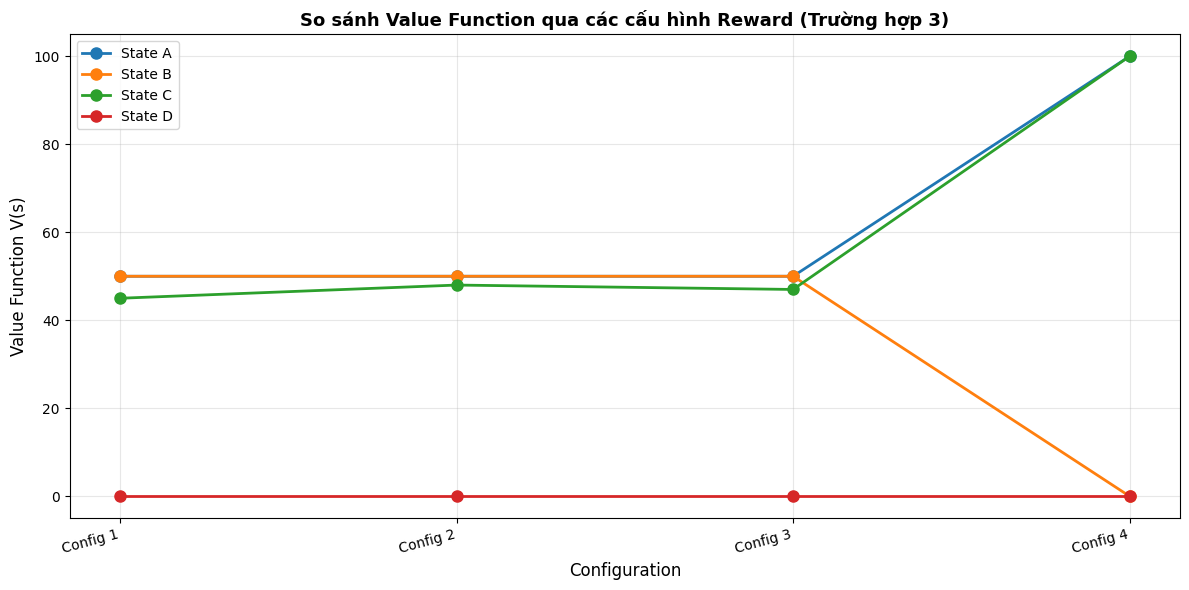

In [5]:
# ============================================
# TRƯỜNG HỢP 3: Phân tích với các cấu trúc Reward khác nhau
# ============================================

# So sánh các cấu hình reward khác nhau
reward_configs = {
    "Config 1: Chỉ B có reward": {"B": 5},
    "Config 2: A và B có reward": {"A": 3, "B": 5},
    "Config 3: Tất cả có reward": {"A": 2, "B": 5, "C": 1, "D": 0},
    "Config 4: C có reward cao": {"C": 10}
}

states = ["A", "B", "C", "D"]
gamma = 0.9

def next_state(s, a):
    transitions = {
        "A": ["A", "B", "C", "A"],
        "B": ["B"],
        "C": ["A", "C", "D", "C"],
        "D": ["D"]
    }
    return transitions[s][a]

# Tính toán cho mỗi cấu hình
config_results = {}

transitions_dict = {
    "A": ["A", "B", "C", "A"],
    "B": ["B"],
    "C": ["A", "C", "D", "C"],
    "D": ["D"]
}

for config_name, rewards in reward_configs.items():
    V = {s: 0.0 for s in states}
    
    for _ in range(100):
        V_new = {}
        for s in states:
            possible_actions = len(transitions_dict[s])
            V_new[s] = max(
                rewards.get(next_state(s, a), 0) + gamma * V[next_state(s, a)]
                for a in range(possible_actions)
            )
        V = V_new
    
    config_results[config_name] = V.copy()

# Tạo DataFrame
config_df = pd.DataFrame({
    "Configuration": list(reward_configs.keys()),
    "V(A)": [config_results[c]["A"] for c in reward_configs.keys()],
    "V(B)": [config_results[c]["B"] for c in reward_configs.keys()],
    "V(C)": [config_results[c]["C"] for c in reward_configs.keys()],
    "V(D)": [config_results[c]["D"] for c in reward_configs.keys()],
})

print("=" * 60)
print("TRƯỜNG HỢP 3: Phân tích với các cấu trúc Reward khác nhau")
print("=" * 60)
print("\nBảng kết quả Value Function theo các cấu hình Reward:")
print(config_df.to_string(index=False))

# Vẽ Bar Chart so sánh
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

config_names_short = ["Config 1", "Config 2", "Config 3", "Config 4"]
x = np.arange(len(states))
width = 0.2

for idx, (config_name, _) in enumerate(reward_configs.items()):
    values = [config_results[config_name][s] for s in states]
    axes[idx].bar(states, values, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'], alpha=0.8)
    axes[idx].set_title(config_names_short[idx], fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('V(s)', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, max([max([config_results[c][s] for s in states]) for c in reward_configs.keys()]) * 1.1)

plt.suptitle('Value Function theo các cấu hình Reward khác nhau (Trường hợp 3)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Vẽ Line Chart: So sánh giá trị của từng state qua các config
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(config_names_short))

for s in states:
    values = [config_results[list(reward_configs.keys())[i]][s] for i in range(len(reward_configs))]
    plt.plot(x_pos, values, marker='o', linewidth=2, markersize=8, label=f'State {s}')

plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Value Function V(s)', fontsize=12)
plt.title('So sánh Value Function qua các cấu hình Reward (Trường hợp 3)', fontsize=13, fontweight='bold')
plt.xticks(x_pos, config_names_short, rotation=15, ha='right')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# TỔNG HỢP VÀ KẾT LUẬN

## Bảng tóm tắt các công thức chính:

| Phương pháp | Công thức | Khi nào dùng? | Ưu điểm | Nhược điểm |
|------------|-----------|---------------|---------|------------|
| **Giải tích** | `V = (I - γP)⁻¹ × R` | MDP nhỏ, cần độ chính xác cao | Chính xác 100%, nhanh (1 lần tính) | Cần ma trận P đầy đủ, không scale với MDP lớn |
| **Value Iteration** | `V_{k+1}(s) = max_a [R(s,a) + γ×V_k(s')]` | MDP lớn, không biết ma trận P | Linh hoạt, dễ implement | Cần nhiều iteration, kết quả xấp xỉ |

## Mối quan hệ giữa các tham số:

### 1. **Discount Factor (γ)**:
```
γ ↑ → V(s) ↑ (cho states có thể đến reward)
γ = 0 → Chỉ quan tâm reward ngay lập tức
γ → 1 → Quan tâm reward tương lai xa
```

### 2. **Reward Structure (R)**:
```
R(s) ↑ → V(s) ↑ (trực tiếp)
R(s') ↑ → V(s) ↑ (gián tiếp, nếu có thể đến s' từ s)
```

### 3. **Transition Probabilities (P)**:
```
P(s'|s,a) ↑ → Ảnh hưởng của V(s') lên V(s) tăng
States có nhiều đường đến reward cao → V cao hơn
```

## Công thức tổng quát Bellman Equation:

### Dạng ma trận (cho phương pháp giải tích):
```
V = R + γPV
(I - γP)V = R
V = (I - γP)⁻¹R
```

### Dạng iterative (cho value iteration):
```
V_{k+1}(s) = max_{a∈A(s)} [R(s,a) + γ Σ_{s'} P(s'|s,a) V_k(s')]
```

### Dạng optimal (cho policy tối ưu):
```
V*(s) = max_a [R(s,a) + γ Σ_{s'} P(s'|s,a) V*(s')]
π*(s) = argmax_a [R(s,a) + γ Σ_{s'} P(s'|s,a) V*(s')]
```

## Lưu ý quan trọng:

- **Hội tụ**: Value iteration hội tụ khi γ < 1
- **Độ chính xác**: Phương pháp giải tích luôn chính xác hơn
- **Hiệu suất**: Value iteration phù hợp cho bài toán lớn
- **Thiết kế**: Reward function quyết định behavior của agent
- **Tuning**: γ cần được điều chỉnh theo từng bài toán cụ thể
